<a href="https://colab.research.google.com/github/apurbaanik/ML_Final_Project_NBA/blob/main/ML_Final_Project_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning Final Project - NBA Champion Prediction Based on Regular Season Stats

---


- Team: Anik Barua, Kashyapa Jayasekera
- CS-UY 4563 B
- Date: 11-24-2022

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline

## Part 1: Loading the dataset

In [4]:
data = 'https://raw.githubusercontent.com/apurbaanik/ML_Final_Project_NBA/main/NBA_Team_Stats.csv'
df = pd.read_csv(data)
df.head(20)

,No,Team,G,Min,Pts,Reb,Ast,Stl,Blk,To,Pf,Dreb,Oreb,FGPct,3PPct,FTPct,Eff,Deff,Year,Won
0,1,Chicago,103,48.4,96.0,44.1,23.1,8.6,4.3,13.0,21.1,29.2,14.9,0.449,0.323,0.741,111.6,17.5,1997-1998,Yes
1,2,Utah,102,48.3,98.6,40.8,24.7,7.6,4.8,14.7,24.3,29.5,11.3,0.483,0.368,0.768,116.3,17.5,1997-1998,No
2,3,Phoenix,86,48.6,99.3,41.9,25.6,9.2,5.3,14.4,21.7,29.8,12.1,0.466,0.355,0.747,117.1,13.6,1997-1998,No
3,4,L.A.Lakers,95,48.3,104.8,42.9,24.3,8.7,6.8,14.7,22.9,29.7,13.2,0.480,0.350,0.675,120.8,13.2,1997-1998,No
4,5,San Antonio,91,48.4,92.5,44.1,21.9,6.2,6.9,15.3,21.2,32.2,11.9,0.468,0.344,0.688,108.0,13.1,1997-1998,No
5,6,Indiana,98,48.4,95.3,38.6,22.4,7.8,4.5,13.6,23.0,28.2,10.4,0.468,0.387,0.763,109.0,12.2,1997-1998,No
6,7,Miami,87,48.2,94.5,41.7,21.1,8.0,5.2,14.2,24.2,29.4,12.3,0.449,0.355,0.735,107.4,10.0,1997-1998,No
7,8,Seattle,92,48.2,100.0,38.5,24.0,9.7,4.5,13.4,22.3,27.0,11.5,0.471,0.390,0.724,114.5,9.4,1997-1998,No
8,9,Atlanta,86,48.5,95.5,42.8,19.0,8.0,5.9,14.0,20.5,29.5,13.4,0.454,0.335,0.753,108.1,7.3,1997-1998,No
9,10,New York,92,48.4,91.3,41.4,21.5,7.8,3.2,14.7,24.1,29.6,11.8,0.446,0.341,0.771,102.3,7.2,1997-1998,No


## Part 2: Preprocessing Step

1. Dropping columns: "No", "Team", "Year"
2. Using `preprocessing` to scale the data
3. Implementing One Hot Encoding for "Won" column

In [5]:
df = df.drop(columns=['No', 'Team', 'Year'])

#### Converting df to data(<np.ndarray>)

In [6]:
xnames = ['G','Min','Pts','Reb','Ast','Stl','Blk','To','Pf','Dreb','Oreb','FGPct','3PPct','FTPct','Eff','Deff']
X = np.array(df[xnames]) # X now contains all the features
y = np.array(df[['Won']])

#### One Hot Encoding

In [7]:
one_hot_encoding = OneHotEncoder()
y_transformed = one_hot_encoding.fit_transform(y)
y = (y_transformed.toarray())[:,1].reshape(X.shape[0],1)

#### Training and Validation Set
Splitting the data in 60% training, 20% test, and 20% validation

In [8]:
# Preprocessing 
X_scale = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.25, train_size=0.75, random_state=42)
y_2d_train = y_train.reshape(y_train.size,1)
y_2d_test = y_test.reshape(y_test.size,1)

scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
print('X_train.shape: ', X_train.shape)
print('y_2d_train.shape: ', y_2d_train.shape)

X_train.shape:  (543, 16)
y_2d_train.shape:  (543, 1)


# Part 2: Models

## Neural Networks

In [59]:
from sklearn.neural_network import MLPClassifier

# activation function - sigmoid, relu, tanh
# we can also chnage the number of iterations
# chanage the number of hidden layers
# Also regularization and the learning rate

# sigmoid
print("With sigmoid activation function -")
sig_scores = []
sig_train_score = []
layers = [1, 10, 50 ,100, 250, 500, 1000, 2000, 3000]
for i in layers:
  clf = MLPClassifier(random_state=1, hidden_layer_sizes = i, activation = 'logistic', max_iter=3000).fit(X_train, y_train.reshape(y_train.size,))
  score1 = clf.score(X_test, y_test)
  sig_scores.append(score1)
  score2 = clf.score(X_train, y_train)
  sig_train_score.append(score2)
  print("Number of hidden layers: " + str(i) + "; test accuracy: " + str(score1) + "; train accuracy: " + str(score2))

With sigmoid activation function -
Number of hidden layers: 1; test accuracy: 0.9615384615384616; train accuracy: 0.9668508287292817
Number of hidden layers: 10; test accuracy: 0.9615384615384616; train accuracy: 0.9668508287292817
Number of hidden layers: 50; test accuracy: 0.9615384615384616; train accuracy: 0.9668508287292817
Number of hidden layers: 100; test accuracy: 0.9615384615384616; train accuracy: 0.9686924493554327
Number of hidden layers: 250; test accuracy: 0.9615384615384616; train accuracy: 0.9760589318600368
Number of hidden layers: 500; test accuracy: 0.9615384615384616; train accuracy: 0.9779005524861878
Number of hidden layers: 1000; test accuracy: 0.9615384615384616; train accuracy: 0.9760589318600368
Number of hidden layers: 2000; test accuracy: 0.9560439560439561; train accuracy: 0.9797421731123389
Number of hidden layers: 3000; test accuracy: 0.9560439560439561; train accuracy: 0.9797421731123389


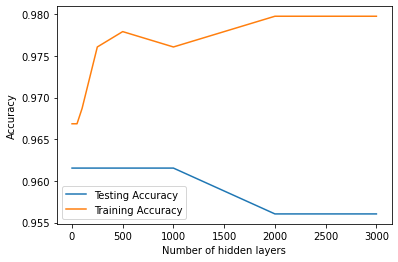

In [60]:
plt.plot(layers, sig_scores, label = "Testing Accuracy")
plt.plot(layers, sig_train_score, label = "Training Accuracy")
plt.title("Using sigmoid activation")
plt.xlabel("Number of hidden layers")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

With regularization term - sigmoid
Alpha values: 1e-06; test accuracy: 0.9615384615384616; train accuracy: 0.9686924493554327
Alpha values: 1e-05; test accuracy: 0.9615384615384616; train accuracy: 0.9686924493554327
Alpha values: 0.0001; test accuracy: 0.9615384615384616; train accuracy: 0.9686924493554327
Alpha values: 0.001; test accuracy: 0.9615384615384616; train accuracy: 0.9686924493554327
Alpha values: 0.01; test accuracy: 0.9615384615384616; train accuracy: 0.9668508287292817
Alpha values: 0.1; test accuracy: 0.9615384615384616; train accuracy: 0.9668508287292817
Alpha values: 1; test accuracy: 0.9615384615384616; train accuracy: 0.9668508287292817
Alpha values: 10; test accuracy: 0.9615384615384616; train accuracy: 0.9668508287292817


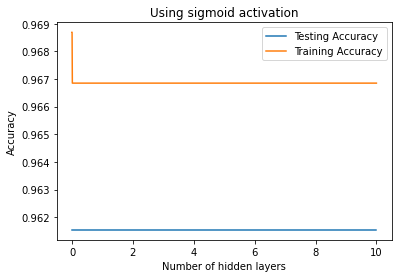

In [130]:
# regularization for sigmoid
print("With regularization term - sigmoid")
sig_scores = []
sig_train_score = []
alphas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
for i in alphas:
  clf = MLPClassifier(random_state=1, hidden_layer_sizes = 100, alpha = i, activation = 'logistic', max_iter=3000).fit(X_train, y_train.reshape(y_train.size,))
  score1 = clf.score(X_test, y_test)
  sig_scores.append(score1)
  score2 = clf.score(X_train, y_train)
  sig_train_score.append(score2)
  print("Alpha values: " + str(i) + "; test accuracy: " + str(score1) + "; train accuracy: " + str(score2))
plt.plot(alphas, sig_scores, label = "Testing Accuracy")
plt.plot(alphas, sig_train_score, label = "Training Accuracy")
plt.title("Using sigmoid activation")
plt.xlabel("Number of hidden layers")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [118]:
# relu
print("With relu activation function -")
sig_scores = []
sig_train_score = []
layers = [1, 10, 50 ,100, 250, 500, 1000, 2000, 3000]
for i in layers:
  clf = MLPClassifier(random_state=1, hidden_layer_sizes = i, activation = 'relu', max_iter=3000).fit(X_train, y_train.reshape(y_train.size,))
  score1 = clf.score(X_test, y_test)
  sig_scores.append(score1)
  score2 = clf.score(X_train, y_train)
  sig_train_score.append(score2)
  print("Number of hidden layers: " + str(i) + "; test accuracy: " + str(score1) + "; train accuracy: " + str(score2))

With relu activation function -
Number of hidden layers: 1; test accuracy: 0.9615384615384616; train accuracy: 0.9668508287292817
Number of hidden layers: 10; test accuracy: 0.967032967032967; train accuracy: 0.990791896869245
Number of hidden layers: 50; test accuracy: 0.967032967032967; train accuracy: 0.998158379373849
Number of hidden layers: 100; test accuracy: 0.967032967032967; train accuracy: 1.0
Number of hidden layers: 250; test accuracy: 0.967032967032967; train accuracy: 1.0
Number of hidden layers: 500; test accuracy: 0.9615384615384616; train accuracy: 1.0
Number of hidden layers: 1000; test accuracy: 0.967032967032967; train accuracy: 1.0
Number of hidden layers: 2000; test accuracy: 0.9615384615384616; train accuracy: 1.0
Number of hidden layers: 3000; test accuracy: 0.9615384615384616; train accuracy: 1.0


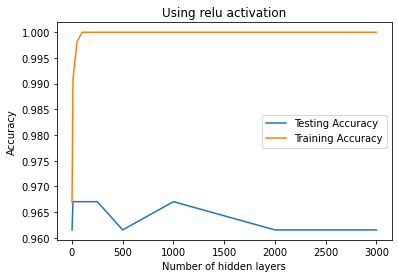

In [62]:
plt.plot(layers, sig_scores, label = "Testing Accuracy")
plt.plot(layers, sig_train_score, label = "Training Accuracy")
plt.title("Using relu activation")
plt.xlabel("Number of hidden layers")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

With regularization term - relu
Alpha values: 1e-06; test accuracy: 0.967032967032967; train accuracy: 0.990791896869245
Alpha values: 1e-05; test accuracy: 0.967032967032967; train accuracy: 0.990791896869245
Alpha values: 0.0001; test accuracy: 0.967032967032967; train accuracy: 0.990791896869245
Alpha values: 0.001; test accuracy: 0.967032967032967; train accuracy: 0.990791896869245
Alpha values: 0.01; test accuracy: 0.967032967032967; train accuracy: 0.990791896869245
Alpha values: 0.1; test accuracy: 0.9615384615384616; train accuracy: 0.988950276243094
Alpha values: 1; test accuracy: 0.967032967032967; train accuracy: 0.9834254143646409
Alpha values: 10; test accuracy: 0.9615384615384616; train accuracy: 0.9668508287292817


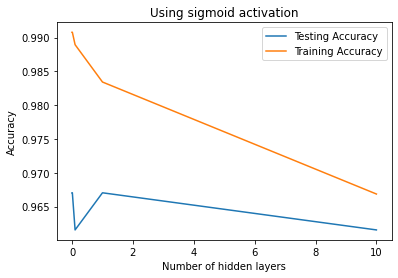

In [121]:
# regularization for relu
print("With regularization term - relu")
sig_scores = []
sig_train_score = []
alphas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
for i in alphas:
  clf = MLPClassifier(random_state=1, hidden_layer_sizes = 10, alpha = i, activation = 'relu', max_iter=3000).fit(X_train, y_train.reshape(y_train.size,))
  score1 = clf.score(X_test, y_test)
  sig_scores.append(score1)
  score2 = clf.score(X_train, y_train)
  sig_train_score.append(score2)
  print("Alpha values: " + str(i) + "; test accuracy: " + str(score1) + "; train accuracy: " + str(score2))
plt.plot(alphas, sig_scores, label = "Testing Accuracy")
plt.plot(alphas, sig_train_score, label = "Training Accuracy")
plt.title("Using sigmoid activation")
plt.xlabel("Number of hidden layers")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [63]:
# tanh
print("With relu activation function -")
sig_scores = []
sig_train_score = []
layers = [1, 10, 50 ,100, 250, 500, 1000, 2000, 3000]
for i in layers:
  clf = MLPClassifier(random_state=1, hidden_layer_sizes = i, activation = 'tanh', max_iter=3000).fit(X_train, y_train.reshape(y_train.size,))
  score1 = clf.score(X_test, y_test)
  sig_scores.append(score1)
  score2 = clf.score(X_train, y_train)
  sig_train_score.append(score2)
  print("Number of hidden layers: " + str(i) + "; test accuracy: " + str(score1) + "; train accuracy: " + str(score2))

With relu activation function -
Number of hidden layers: 1; test accuracy: 0.9615384615384616; train accuracy: 0.9668508287292817
Number of hidden layers: 10; test accuracy: 0.9615384615384616; train accuracy: 0.9834254143646409
Number of hidden layers: 50; test accuracy: 0.9615384615384616; train accuracy: 1.0
Number of hidden layers: 100; test accuracy: 0.9615384615384616; train accuracy: 1.0
Number of hidden layers: 250; test accuracy: 0.9560439560439561; train accuracy: 1.0
Number of hidden layers: 500; test accuracy: 0.9505494505494505; train accuracy: 1.0
Number of hidden layers: 1000; test accuracy: 0.9560439560439561; train accuracy: 1.0
Number of hidden layers: 2000; test accuracy: 0.945054945054945; train accuracy: 0.9797421731123389
Number of hidden layers: 3000; test accuracy: 0.9505494505494505; train accuracy: 0.9815837937384899


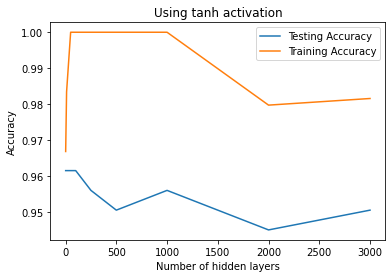

In [64]:
plt.plot(layers, sig_scores, label = "Testing Accuracy")
plt.plot(layers, sig_train_score, label = "Training Accuracy")
plt.title("Using tanh activation")
plt.xlabel("Number of hidden layers")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

With regularization term - tanh
Alpha values: 1e-06; test accuracy: 0.9615384615384616; train accuracy: 1.0
Alpha values: 1e-05; test accuracy: 0.9615384615384616; train accuracy: 1.0
Alpha values: 0.0001; test accuracy: 0.9615384615384616; train accuracy: 1.0
Alpha values: 0.001; test accuracy: 0.9615384615384616; train accuracy: 1.0
Alpha values: 0.01; test accuracy: 0.9615384615384616; train accuracy: 1.0
Alpha values: 0.1; test accuracy: 0.9615384615384616; train accuracy: 0.998158379373849
Alpha values: 1; test accuracy: 0.967032967032967; train accuracy: 0.9779005524861878
Alpha values: 10; test accuracy: 0.9615384615384616; train accuracy: 0.9668508287292817


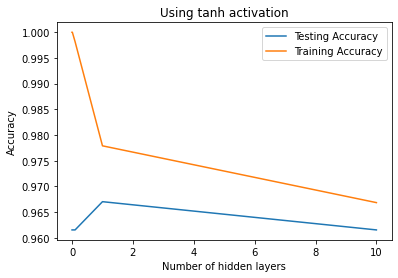

In [126]:
# regularization for tanh
print("With regularization term - tanh")
sig_scores = []
sig_train_score = []
alphas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
for i in alphas:
  clf = MLPClassifier(random_state=1, hidden_layer_sizes = 100, alpha = i, activation = 'tanh', max_iter=3000).fit(X_train, y_train.reshape(y_train.size,))
  score1 = clf.score(X_test, y_test)
  sig_scores.append(score1)
  score2 = clf.score(X_train, y_train)
  sig_train_score.append(score2)
  print("Alpha values: " + str(i) + "; test accuracy: " + str(score1) + "; train accuracy: " + str(score2))
plt.plot(alphas, sig_scores, label = "Testing Accuracy")
plt.plot(alphas, sig_train_score, label = "Training Accuracy")
plt.title("Using tanh activation")
plt.xlabel("Number of hidden layers")
plt.ylabel("Accuracy")
plt.legend()
plt.show()